In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from matplotlib import animation

np.random.seed(31415)

In [2]:
cm = plt.cm.RdBu

cm_bright = ListedColormap(["#0000FF", "#FF0000"])

def get_Xgrid():

    dlim=[-2,2.7,-2,2.7]

    d1lim = dlim[:2]
    d2lim = dlim[2:]
    d1_grid, d2_grid = np.meshgrid(np.arange(d1lim[0], d1lim[1], 0.02), np.arange(d2lim[0], d2lim[1], 0.02))
    X0 = d1_grid.ravel()
    X1 = d2_grid.ravel()

    d12_array = np.empty((len(X0),2))
    d12_array[:,0] = X0
    d12_array[:,1] = X1
        
    return d1_grid, d2_grid, d12_array


def plot_RF_contour(model):
    
    d1_grid, d2_grid, d12_array = get_Xgrid()
    n = d1_grid.shape[0]
    y_array = model.predict_proba(d12_array)
    y_array = y_array[:,0]
    y_grid = y_array.reshape((n,n))

    fig, ax = plt.subplots(figsize=(8,8))
    db = plt.contourf(d1_grid, d2_grid, y_grid,cmap=cm,alpha=0.7)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="w")
    plt.xlim((-2,2.7))
    plt.ylim((-2,2.7))
    plt.xticks(())
    plt.yticks(())
    plt.axis('equal')
    plt.grid(linestyle='--')
    ax.axis('off')
    return db
    
    

def plot_RF_colormesh(model):
    
    d1_grid, d2_grid, d12_array = get_Xgrid()
    n = d1_grid.shape[0]
    y_array = model.predict_proba(d12_array)
    y_array = y_array[:,0]
    y_grid = y_array.reshape((n,n))

    fig, ax = plt.subplots(figsize=(8,8))
    db = plt.pcolormesh(d1_grid, d2_grid, y_grid,cmap=cm,alpha=0.7)
    tit = plt.title('')

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="w")
    plt.xlim((-2,2.7))
    plt.ylim((-2,2.7))
    plt.xticks(())
    plt.yticks(())
    plt.axis('equal')
    plt.grid(linestyle='--')
    ax.axis('off')
    return db, tit

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=150, noise=0.22)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

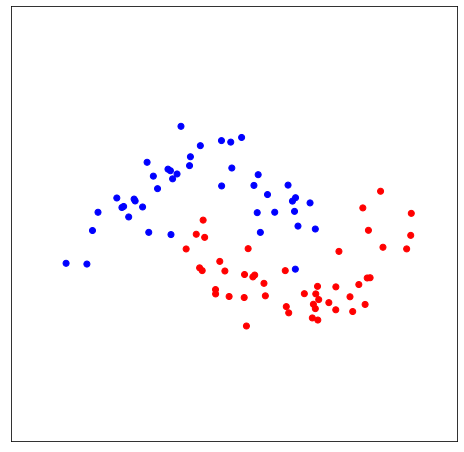

In [3]:
X, y = make_moons(n_samples=150, noise=0.22 , random_state=13)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4 , random_state=3498)


h = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.xlim((-2,2.7))
plt.ylim((-2,2.7))
plt.xticks(())
plt.yticks(())
# plt.axis('equal')
plt.grid(linestyle='--')

# Random forest

In [11]:
model = RandomForestClassifier(n_estimators=8).fit(X_train, y_train)
model.feature_importances_

array([0.32638261, 0.67361739])

/tmp/ipykernel_31974/2360400753.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  db = plt.pcolormesh(d1_grid, d2_grid, y_grid,cmap=cm,alpha=0.7)


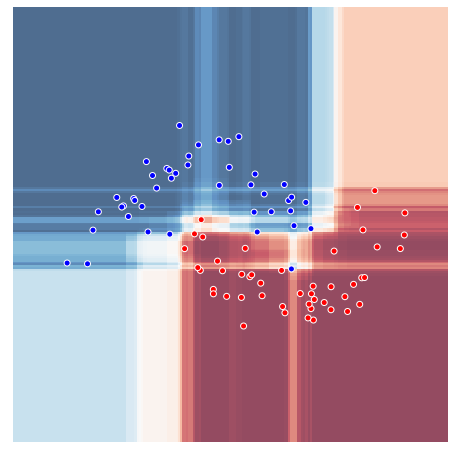

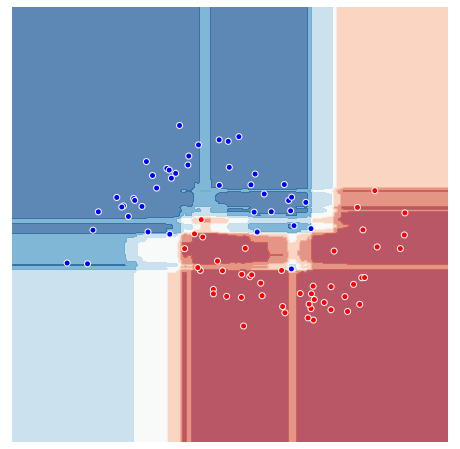

In [4]:

plot_RF_colormesh(model)
plot_RF_contour(model)

# Animation

/tmp/ipykernel_31974/2677845693.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  db = plt.pcolormesh(d1_grid, d2_grid, y_grid,cmap=cm)


(-2.0, 2.680000000000004, -2.0, 2.680000000000004)

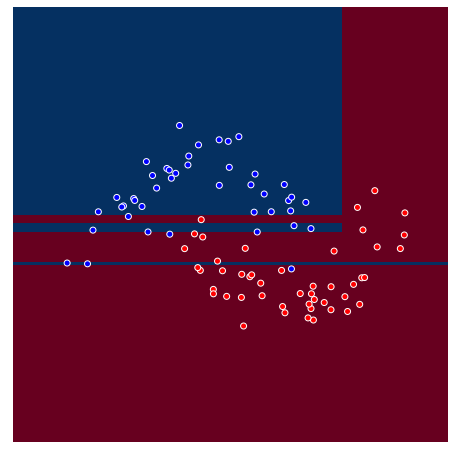

In [5]:
model = RandomForestClassifier(n_estimators=1)
model.fit(X_train, y_train)

d1_grid, d2_grid, d12_array = get_Xgrid()
n = d1_grid.shape[0]
y_array = model.predict_proba(d12_array)
y_array = y_array[:,0]
y_grid = y_array.reshape((n,n))

fig, ax = plt.subplots(figsize=(8,8))
db = plt.pcolormesh(d1_grid, d2_grid, y_grid,cmap=cm)
tit = plt.title('')

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="w")
plt.xlim((-2,2.7))
plt.ylim((-2,2.7))
plt.xticks(())
plt.yticks(())
plt.axis('equal')
plt.grid(linestyle='--')
ax.axis('off')


In [6]:
def init():
    Z = np.append(np.zeros((200,200)), np.ones((200,200)),axis=1)
    db.set_array(Z.ravel())
    return db,

# animation function.  This is called sequentially
def animate_rf(i):
    nest = i+1
    model = RandomForestClassifier(n_estimators=nest, max_features=1)
    model.fit(X_train, y_train)
    
    d1_grid, d2_grid, d12_array = get_Xgrid()
    n = d1_grid.shape[0]

    y_array = model.predict_proba(d12_array)
    y_array = y_array[:,0]
    y_grid = y_array.reshape((n,n))
    
    db.set_array(y_grid[:-1,:-1].ravel())
    tit.set_text("# trees={}".format(nest))
    return db,

In [7]:
anim = animation.FuncAnimation(fig, animate_rf, init_func=init,
                               frames=100, interval=20, blit=True)
anim.save('rf.mp4', fps=6, extra_args=['-vcodec', 'libx264'])

# Plot individual trees

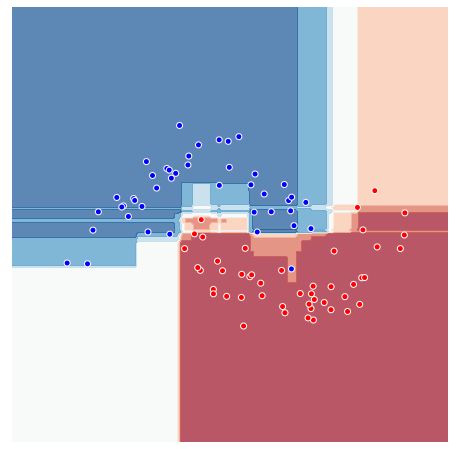

In [8]:
model = RandomForestClassifier(n_estimators=10, max_features=1)
model.fit(X_train, y_train)
plot_RF_contour(model)

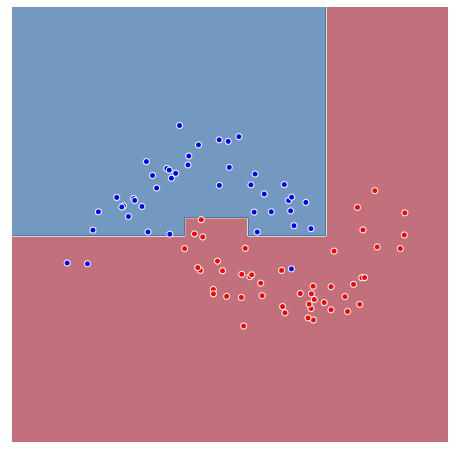

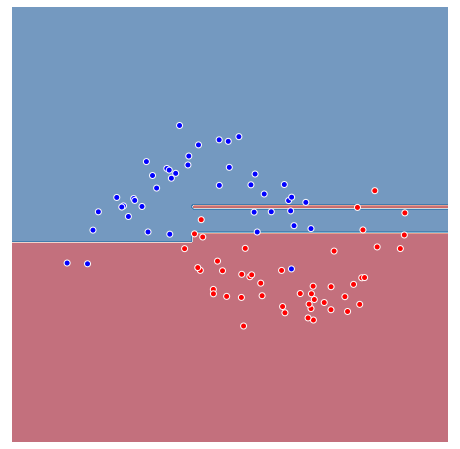

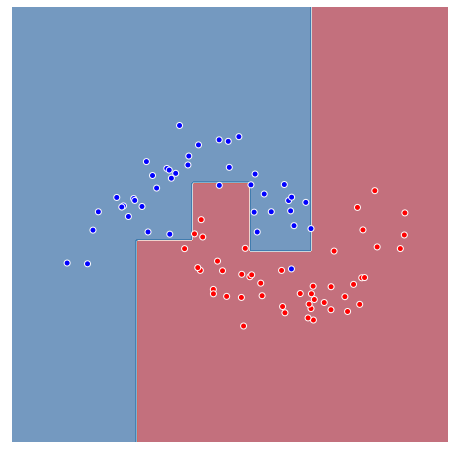

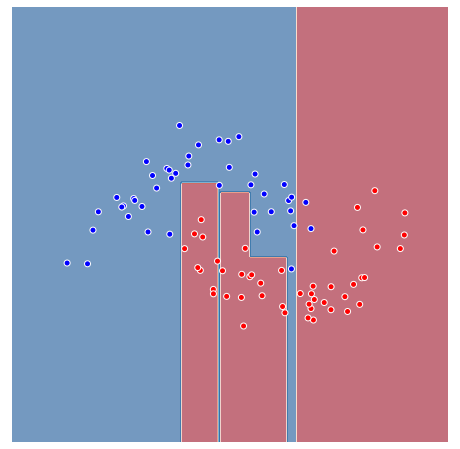

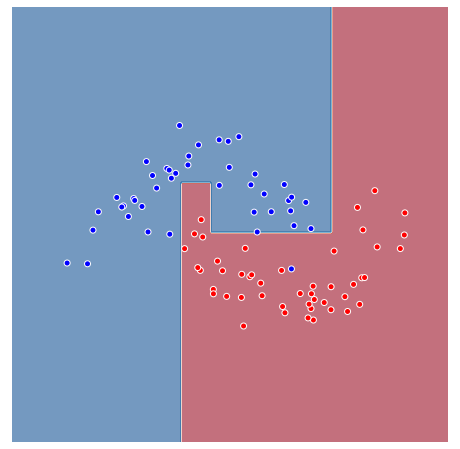

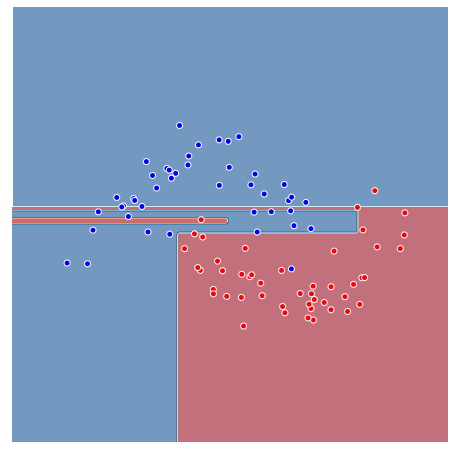

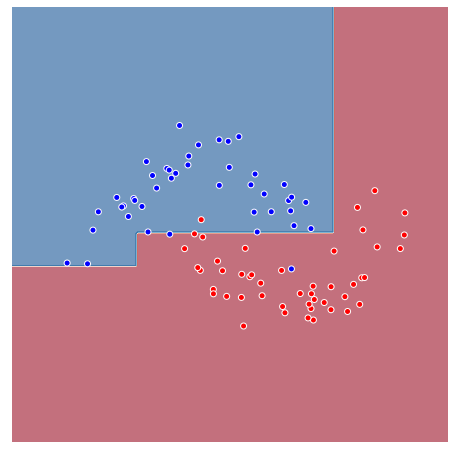

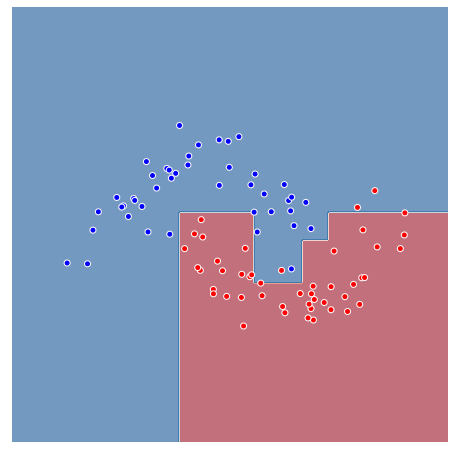

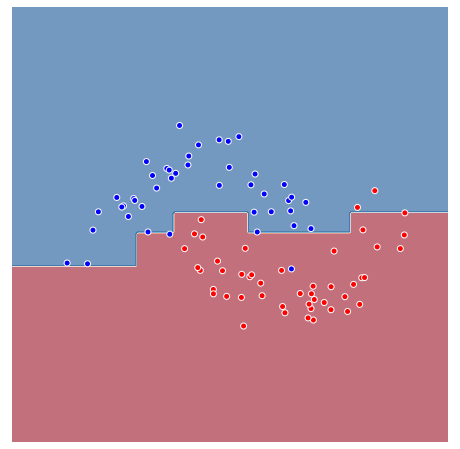

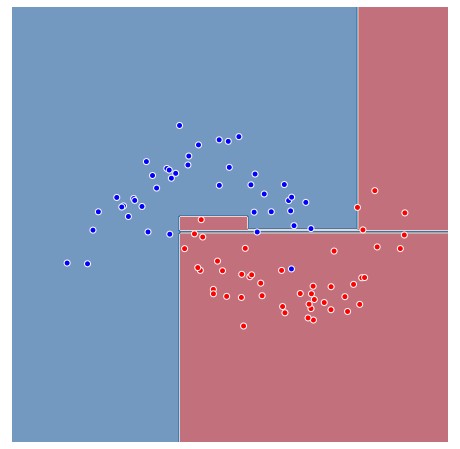

In [10]:
d1_grid, d2_grid, d12_array = get_Xgrid()
n = d1_grid.shape[0]

for i, tree in enumerate(model.estimators_):

    y_array = tree.predict_proba(d12_array)
    y_array = y_array[:,0]
    y_grid = y_array.reshape((n,n))

    fig, ax = plt.subplots(figsize=(8,8))
#     db = plt.pcolormesh(d1_grid, d2_grid, y_grid,cmap=cm)
    db = plt.contourf(d1_grid, d2_grid, y_grid,cmap=cm,alpha=0.6)
#     tit = plt.title("HELLO",fontsize=24)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="w")
    plt.xlim((-2,2.7))
    plt.ylim((-2,2.7))
    plt.xticks(())
    plt.yticks(())
    plt.axis('equal')
    plt.grid(linestyle='--')
    ax.axis('off')
    
    plt.savefig("tree{}".format(i), transparent=True)
